# Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

*     Построить точечный график
*     Рассчитать коэффициенты корреляции Пирсона и Спирмена
*     Построить модель линейной регрессии
*     Рассчитать коэффициент детерминации
*     Вывести график остатков

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

1.     Разделить данные на 2 группы
1.     Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


**Заметки:**
* Между смертностью и концентрацией калия в питьевой воде существует обратная взаимосвязь (чем больше кальция, тем ниже смертность)
* Коэффициент детерминации для всех городов на имеет приемлемое значение (больше 0,5)
* При разбиении даннх на северные и южные города коэффициент детерминации сильно падает, думаю, ввиду малого количества данных.

In [4]:
# Подключаем библиотеки

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
#загружаем и смотрим файл
#загружаем все столбцы, кроме первого, т.к он содержит номера п/п и для наших задач не нужен
df_water = pd.read_csv('water.csv', usecols=[1,2,3,4])
df_water.head(15)

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15
7,South,Bournemouth,1299,78
8,North,Bradford,1637,10
9,South,Brighton,1359,84


In [6]:
df_water.info() #пропусков нет, типы данных корректны

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [7]:
df_water.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


Text(0, 0.5, 'Смертность')

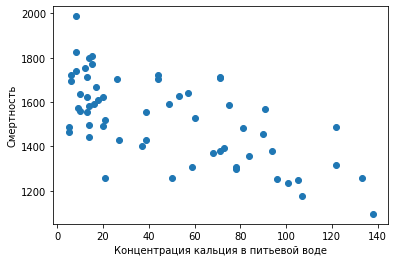

In [70]:
plt.scatter(df_water['hardness'], df_water['mortality'])
plt.xlabel('Концентрация кальция в питьевой воде')
plt.ylabel('Смертность')

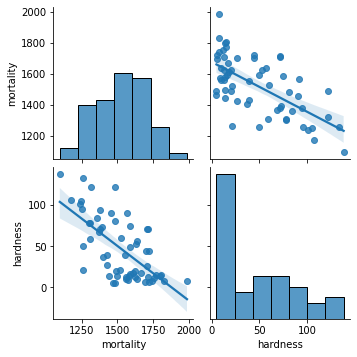

In [11]:
# можем использовать pairplot для изучения взаимосвязи между множеством признаков
sns.pairplot(df_water, kind='reg')

In [12]:
# считаем коэф. корреляции Пирсона
df_water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [13]:
# считаем коэф. корреляции Спирмана
df_water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


### Регрессия

In [16]:
x = df_water[['hardness']]
y = df_water['mortality']

In [17]:
#разбиваем данные на тестовые и тренировочные
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [18]:
model = LinearRegression()
model.fit(x_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [19]:
model.coef_
#предсказанный ответ возрастает до -3.58 при x, увеличенным на единицу

array([-3.58885575])

In [20]:
model.intercept_
#показывает, что модель предсказывает ответ 1705.26 при x, равном нулю.

1705.2691982878137

In [21]:
y_pred = model.predict(x_test)
y_pred

array([1450.46043975, 1655.02521773, 1360.7390459 , 1658.61407349,
       1342.79476713, 1608.37009293, 1687.32491952, 1425.33844947,
       1687.32491952, 1267.4287963 , 1321.26163261, 1450.46043975,
       1655.02521773, 1525.82641059, 1547.35954511, 1450.46043975,
       1425.33844947, 1436.10501674, 1651.43636198])

In [22]:
y_test

50    1713
46    1495
14    1254
51    1557
41    1236
35    1427
38    1486
7     1299
2     1466
58    1486
37    1175
60    1378
32    1581
48    1257
31    1702
53    1709
13    1307
49    1587
28    1772
Name: mortality, dtype: int64

In [23]:
model.score(x_test, y_test) # метод возвращает значение коэффициента детерминации
#приемлемый коэффициент детерминации, т.к больше 0,5

0.05958908901698112

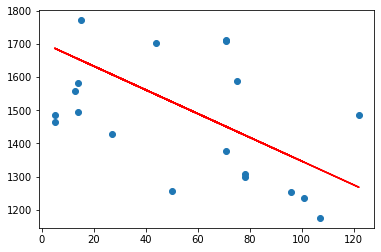

In [24]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

Statsmodel

In [25]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [27]:
x_const = sm.add_constant(x_train) # добавить константу

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
model = sm.OLS(y_train, x_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     27.23
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           5.89e-06
Time:                        09:30:02   Log-Likelihood:                -269.13
No. Observations:                  42   AIC:                             542.3
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1654.7388     37.151     44.541      0.0

In [30]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1654.738786
hardness      -3.110582
dtype: float64
R2:  0.40502812226688023


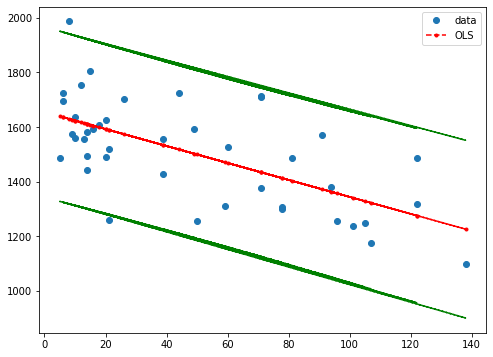

In [31]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(x_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(x_const.iloc[:, 1], iv_u, 'g--')
ax.plot(x_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

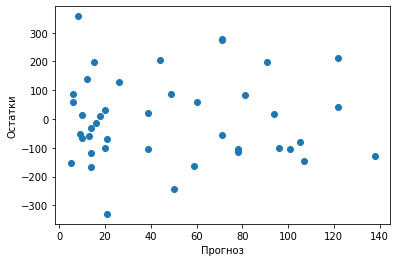

In [32]:
# посмотрим на остатки
plt.scatter(x=x_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

## Анализ данных по северным и южным городам

In [34]:
df_water_north = df_water[df_water['location'] == 'North'] # северные города
df_water_south = df_water[df_water['location'] == 'South'] #южные города

In [35]:
df_water_north.describe()

,mortality,hardness
count,35.000000,35.000000
mean,1633.600000,30.400000
std,136.936911,26.134494
min,1378.000000,6.000000
25%,1557.500000,12.500000
50%,1637.000000,17.000000
75%,1718.000000,44.000000
max,1987.000000,94.000000


In [36]:
df_water_south.describe()

,mortality,hardness
count,26.000000,26.000000
mean,1376.807692,69.769231
std,140.269175,40.360682
min,1096.000000,5.000000
25%,1259.250000,40.250000
50%,1364.000000,75.500000
75%,1485.750000,99.750000
max,1627.000000,138.000000


#### Северные города

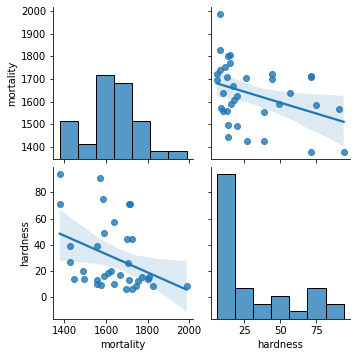

In [37]:
sns.pairplot(df_water_north, kind='reg')

In [38]:
# считаем коэф. корреляции Пирсона
df_water_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [39]:
# считаем коэф. корреляции Спирмана
df_water_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [40]:
#регрессия
x = df_water_north[['hardness']]
y = df_water_north['mortality']

In [41]:
#разбиваем данные на тестовые и тренировочные
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [43]:
model.coef_
#предсказанный ответ возрастает до -1.59 при x, увеличенным на единицу

array([-1.59538123])

In [44]:
model.intercept_
#показывает, что модель предсказывает ответ 1689.04 при x, равном нулю.

1689.0420758509913

In [45]:
y_pred = model.predict(x_test)
y_pred

array([1666.70673868, 1669.89750113, 1647.56216396, 1665.11135745,
       1666.70673868, 1618.84530187, 1626.82220801, 1569.38848385,
       1666.70673868, 1679.46978849, 1575.77000875])

In [46]:
y_test

43    1444
11    1755
30    1704
28    1772
46    1495
20    1723
17    1428
49    1587
3     1800
36    1724
60    1378
Name: mortality, dtype: int64

In [47]:
model.score(x_test, y_test) # метод возвращает значение коэффициента детерминации
#модель не отражает реальное положение вещей, т.к значение сильно меньше 0,5

0.1419903604254782

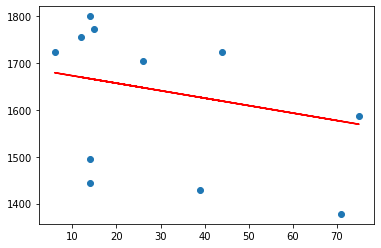

In [48]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

In [49]:
#statsmodel
x_const = sm.add_constant(x_train) # добавить константу
model = sm.OLS(y_train, x_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     2.814
Date:                Sat, 28 Jan 2023   Prob (F-statistic):              0.108
Time:                        09:30:05   Log-Likelihood:                -148.93
No. Observations:                  24   AIC:                             301.9
Df Residuals:                      22   BIC:                             304.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1689.0421     38.715     43.628      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1689.042076
hardness      -1.595381
dtype: float64
R2:  0.1134167381079092


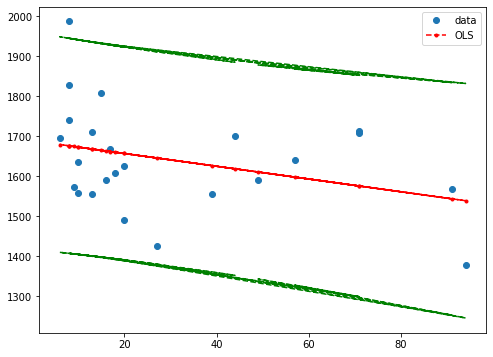

In [51]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(x_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(x_const.iloc[:, 1], iv_u, 'g--')
ax.plot(x_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

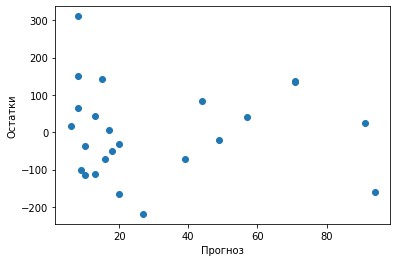

In [52]:
# посмотрим на остатки
plt.scatter(x=x_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

#### Южные города

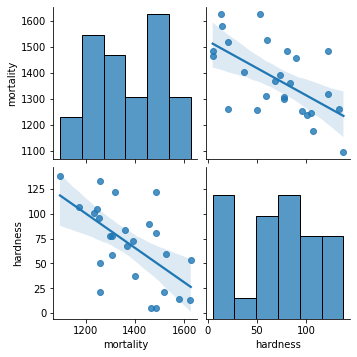

In [53]:
sns.pairplot(df_water_south, kind='reg')

In [54]:
# считаем коэф. корреляции Пирсона
df_water_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [55]:
# считаем коэф. корреляции Спирмана
df_water_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [56]:
#регрессия
x = df_water_south[['hardness']]
y = df_water_south['mortality']

In [57]:
#разбиваем данные на тестовые и тренировочные
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [58]:
model = LinearRegression()
model.fit(x_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [59]:
model.coef_
#предсказанный ответ возрастает до -1.07 при x, увеличенным на единицу

array([-1.07614969])

In [60]:
model.intercept_
#показывает, что модель предсказывает ответ 1478.39 при x, равном нулю.

1478.3952916345334

In [61]:
y_pred = model.predict(x_test)
y_pred

array([1413.82631002, 1329.88663392, 1464.40534562, 1375.08492105,
       1363.24727442, 1365.39957381, 1369.70417259, 1424.58780696])

In [62]:
y_test

56    1527
25    1096
54    1625
14    1254
37    1175
0     1247
41    1236
48    1257
Name: mortality, dtype: int64

In [63]:
model.score(x_test, y_test) # метод возвращает значение коэффициента детерминации
#модель не отражает реальное положение вещей, т.к значение сильно меньше 0,5

0.09700114175361063

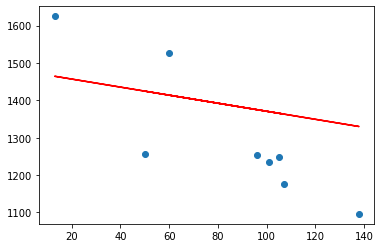

In [64]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

In [65]:
#statsmodel
x_const = sm.add_constant(x_train) # добавить константу
model = sm.OLS(y_train, x_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     2.975
Date:                Sat, 28 Jan 2023   Prob (F-statistic):              0.104
Time:                        09:30:09   Log-Likelihood:                -107.95
No. Observations:                  18   AIC:                             219.9
Df Residuals:                      16   BIC:                             221.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1478.3953     46.524     31.777      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [66]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1478.395292
hardness      -1.076150
dtype: float64
R2:  0.15678216186611582


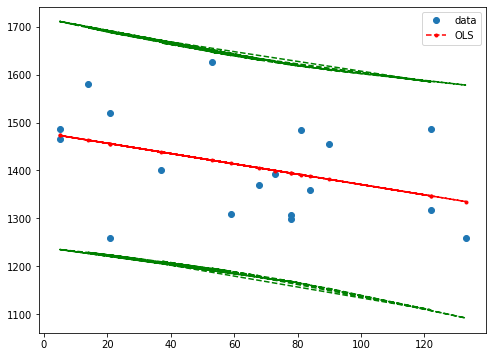

In [67]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(x_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(x_const.iloc[:, 1], iv_u, 'g--')
ax.plot(x_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

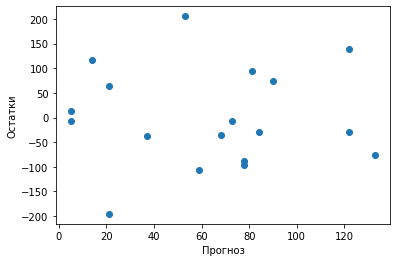

In [68]:
# посмотрим на остатки
plt.scatter(x=x_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')